# Learning Quantum Entalgnment using John Bell Experiment

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2020-10-12 19:12:09,024: Credentials are already in use. The existing account in the session will be replaced.


## Making Entangled State

In [48]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [58]:
provide = IBMQ.get_provider('ibm-q')
backend = provide.get_backend('ibmq_vigo')
job = execute(qc,backend = backend, shots = 1000)
job_monitor(job)

Job Status: job has successfully run


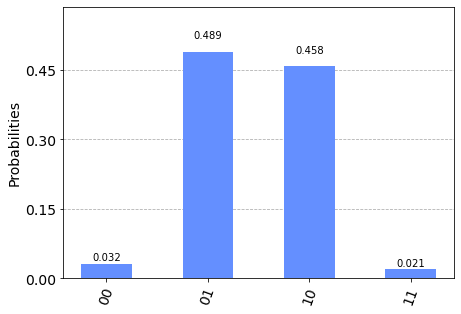

In [59]:
result = job.result()
plot_histogram(result.get_counts())

## Calibrating measurement errors using Qiskit Ignis

In [60]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [61]:
cal_circuits, state_labels = complete_meas_cal(qr=qc.qregs[0], 
                                               circlabel='measurement_calibration')

In [62]:
cal_job = execute(cal_circuits,
             backend=backend,
             shots=8192,
             optimization_level=0)
#print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

Job Status: job has successfully run


## Creating the Measurement Fitter Object in Ignis

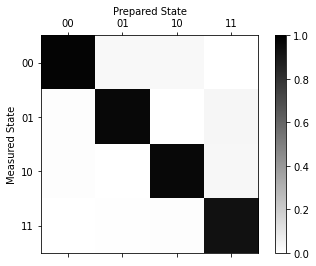

In [63]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

In [64]:
meas_filter = meas_fitter.filter

## Mitigating the measurement errors in our previous device run

In [65]:
mitigated_result = meas_filter.apply(result)

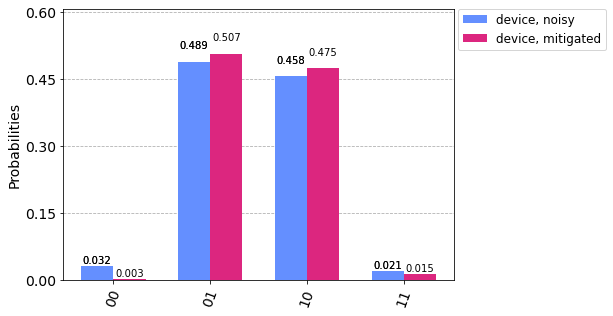

In [66]:
device_counts = result.get_counts()
mitigated_counts = mitigated_result.get_counts(qc)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])


**After setting up our system lets work on the experiment**

## John Bell Experiment 

He gave an expreiment with a simple idea that if particles contain hidden information they would give a 55.55% of the data to be in opprosite state and if there isn't any hidden information and they are entangled then we will se 50% of the data to have opposite spin.

### Random selection of the direction for the qubit to be measured

If we are taking it be random WLOG we can say that we will get 1/3 of the time of each different set of directions.

keeping the first qubit to be fixed at z measurment.
1. Rotation of the 2nd qubit measuremnt basis by 2pi/3 radian.
2. Rotation of the 2nd qubit measuremnt basis by -2pi/3 radian.
3. Keeping the 2nd qubit in the z basis.

These are the 3 set one will get eventully taking out all the symentries from the experiment.

**1. Secoond Qubit measured at a rotation of 2pi/3 Radian**

In [80]:
from numpy import pi

In [96]:
qc_first = QuantumCircuit(2,2)
qc_first.h(0)
qc_first.x(1)
qc_first.cx(0,1)
qc_first.ry(2*pi/3,1)
qc_first.measure([0,1],[0,1])
qc_first.draw()

┌───┐                  ┌─┐   
q_0: ┤ H ├──■───────────────┤M├───
     ├───┤┌─┴─┐┌───────────┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├┤ RY(2pi/3) ├─╫─┤M├
     └───┘└───┘└───────────┘ ║ └╥┘
c_0: ════════════════════════╩══╬═
                                ║ 
c_1: ═══════════════════════════╩═

In [108]:
job_first = execute(qc_first,backend = backend, shots = 1000)
job_monitor(job_first)

Job Status: job has successfully run


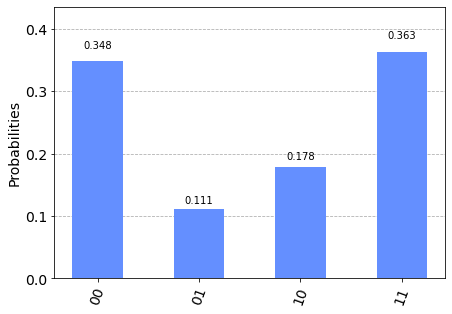

In [109]:
result_first = job_first.result()
counts_first = result_first.get_counts()
plot_histogram(counts_first)

In [110]:
mitigated_result_first = meas_filter.apply(result_first)

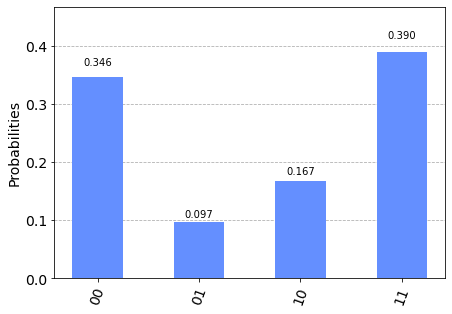

In [111]:
mitigated_counts_first = mitigated_result_first.get_counts()
plot_histogram(mitigated_counts_first)

In [112]:
#Getting out the counts of opposite pairs
opposite_counts_first = mitigated_counts_first['10']+mitigated_counts_first['01']
total_counts_first = mitigated_counts_first['10']+mitigated_counts_first['01']+mitigated_counts_first['00']+mitigated_counts_first['11']

In [113]:
opposite_counts_first

264.2112149946063

**2. Secoond Qubit measured at a rotation of -2pi/3 Radian**

In [100]:
qc_second = QuantumCircuit(2,2)
qc_second.h(0)
qc_second.x(1)
qc_second.cx(0,1)
qc_second.ry(-2*pi/3,1)
qc_second.measure([0,1],[0,1])
qc_second.draw()

┌───┐                   ┌─┐   
q_0: ┤ H ├──■────────────────┤M├───
     ├───┤┌─┴─┐┌────────────┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├┤ RY(-2pi/3) ├─╫─┤M├
     └───┘└───┘└────────────┘ ║ └╥┘
c_0: ═════════════════════════╩══╬═
                                 ║ 
c_1: ════════════════════════════╩═

In [114]:
job_second = execute(qc_second,backend = backend, shots = 1000)
job_monitor(job_second)

Job Status: job has successfully run


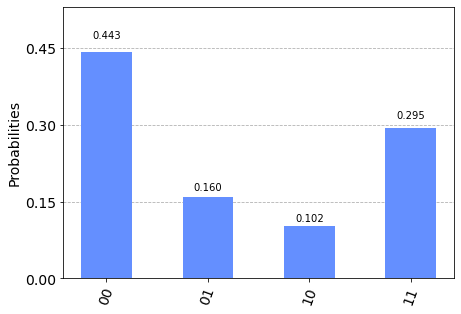

In [115]:
result_second = job_second.result()
counts_second = result_second.get_counts()
plot_histogram(counts_second)

In [122]:
mitigated_result_second = meas_filter.apply(result_second)

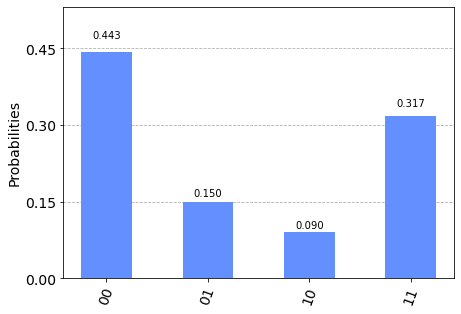

In [124]:
mitigated_counts_second = mitigated_result_second.get_counts()
plot_histogram(mitigated_counts_second)

In [125]:
#Getting out the counts of opposite pairs
opposite_counts_second = mitigated_counts_second['10']+mitigated_counts_second['01']
total_counts_second = mitigated_counts_second['10']+mitigated_counts_second['01']+mitigated_counts_second['00']+mitigated_counts_second['11']

In [126]:
opposite_counts_second

239.83757707829528

**3. Keeping the 2nd qubit in the z basis**

we already have that result but to maintain the flow we would do it again.

In [127]:
qc_third = QuantumCircuit(2,2)
qc_third.h(0)
qc_third.x(1)
qc_third.cx(0,1)
qc_third.measure([0,1],[0,1])
qc_third.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [128]:
job_third = execute(qc_third,backend = backend, shots = 1000)
job_monitor(job_third)

Job Status: job has successfully run


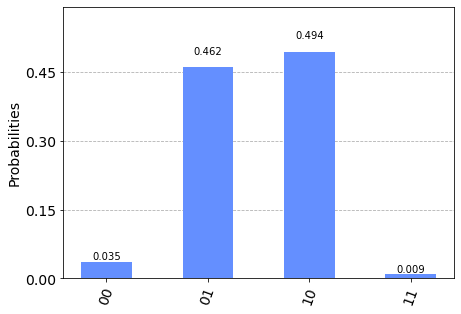

In [129]:
result_third = job_third.result()
counts_third = result_third.get_counts()
plot_histogram(counts_third)

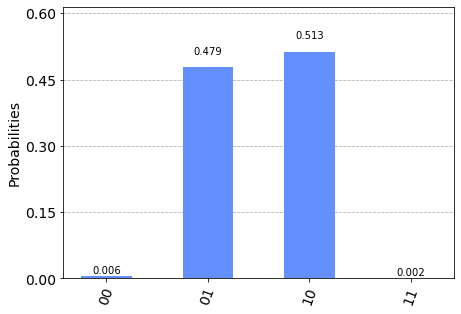

In [130]:
mitigated_result_third = meas_filter.apply(result_third)
mitigated_counts_third = mitigated_result_third.get_counts()
plot_histogram(mitigated_counts_third)

In [131]:
#Getting out the counts of opposite pairs
opposite_counts_third = mitigated_counts_third['10']+mitigated_counts_third['01']
total_counts_third = mitigated_counts_third['10']+mitigated_counts_third['01']+mitigated_counts_third['00']+mitigated_counts_third['11']

In [132]:
opposite_counts_third

991.8503353690438

## Lets find the percentage of opposite states

In [138]:
total_opposite_counts = opposite_counts_first+opposite_counts_second+opposite_counts_third
total_counts = total_counts_first+total_counts_second+total_counts_third

In [143]:
percentage = (total_opposite_counts/total_counts)*100

In [146]:
print("Percentage of qubit in opposit state:-",percentage,"%")

Percentage of qubit in opposit state:- 49.86330424806485 %


## Result

**The Percentage of qubits being in opposite states came to be 50% which leads to the conclusion that the qubits are indeed entangled and don't have a hidden information for being in a speecific state when measured.**